## 평가지표

+ 정확도  
+ 오차행렬  
+ 정밀도  
+ 재현율  
+ F1 스코어  
+ ROC, AUC  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# 정확도
+ 실제 데이터에서 예측 데이터가 얼만가 같은지 판단하는 지표

In [2]:
from sklearn.base import BaseEstimator

class mydummyclassifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        pred=np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i]==1:
                pred[i]=0
            else:
                pred[i]=1
            
        return pred

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#원본 데이터 재로딩,데이터 가공, 학습 데이터/테스트 데이터 분할

data=pd.read_csv('titanic.csv')
y=data['Survived']
x=data.drop('Survived',axis=1)
#x=transform_features(x)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

myclf=mydummyclassifier()
myclf.fit(X_train,y_train)

prediction=myclf.predict(X_test)
print(f'mydummy의 정확도는 {round(accuracy_score(y_test,prediction),4)}')

mydummy의 정확도는 0.3855


------------------------------

#### MNIST 데이터셋을 변환해 정확도 분류해보기

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd


class myfakeclassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
    
digit=load_digits()

y=(digit.target==7).astype(int)
X_train,X_test,y_train,y_test=train_test_split(digit.data,y,random_state=11)

In [5]:
# 불균형 레이블 분포도 확인

print(f'레이블 테스트 크기 {y_test.shape}')
print(f'테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

#dummyclassifier로 평가

fakeclf=myfakeclassifier()
fakeclf.fit(X_train,y_test)
predict=fakeclf.predict(X_test)
print(f'모든 예측을 0으로 하여도 정확도는 {accuracy_score(y_test,predict)}')

레이블 테스트 크기 (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는 0.9


##### 단순히 predict() 결과를 모두 0으로 반환해도 성능이 90%나온다.
##### 불균형한 데이터셋에서 정확도 지표는 옳지 못한 선택임을 알 수있으며
##### 이를 위해 다른 여러 지표를 사용한다.

# 오차 행렬

+ 모델이 얼마나 헷갈리고 있는지도 함께 보여주는 지표
+ 예측 오류가 얼마인지, 어떤 오류가 발생하는지도 나타냄

In [6]:
from IPython.display import Image

# ![title](matrix.png)  마크다운 형식으로 이미지 삽입

![title](matrix.png)

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predict)

array([[405,   0],
       [ 45,   0]], dtype=int64)

![title](matrix_2.png)

# 정밀도와 재현율

+ Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가지표
    + 정밀도 = TP/(FP+TP)
    + 재현율 = TP/(FN+TP)

In [8]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [9]:
def get_clf_eval(y_test,pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    print(f'정확도: {round(accuracy,4)}, 정밀도: {round(precision,4)}, 재현율: {round(recall,4)}')

In [10]:
from sklearn import preprocessing
def fillna(data):
    data['Age'].fillna(data['Age'].mean(),inplace=True)
    data['Cabin'].fillna('N',inplace=True)
    data['Embarked'].fillna('N',inplace=True)
    data['Fare'].fillna(0,inplace=True)
    
    return data

def drop(data):
    data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return data

def format_feature(data):
    data['Cabin']=data['Cabin'].str[:1]
    features=['Cabin','Sex','Embarked']
    for i in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(data[i])
        data[i]=le.transform(data[i])
    return data

#함수들 호출해 전처리 수행

def transform(data):
    data=fillna(data)
    data=drop(data)
    data=format_feature(data)
    return data

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data=pd.read_csv('titanic.csv')
y=data['Survived']
x=data.drop('Survived',axis=1)
x=transform(x)

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)

get_clf_eval(y_test,pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


#### 매번 데이터셋을 전처리 할 순 없으니 x,y를 합친 preprocessing을 내보내서 활용할 예정..
 + x['Survived']=y
 + x.to_csv('preprocessing.csv',index=False)

### 정밀도 / 재현율 트레이드 오프

+ 정밀도와 재현율은 상호 보완적이라 한쪽을 높이면 다른 한쪽은 떨어진다 - 트레이드 오프    
+ predict_proba() -개별 데이터별로 예측 확률을 반환함.

In [23]:
pred_proba = lr_clf.predict_proba(X_test)
pred=lr_clf.predict(X_test)

print(f'pred_proba() 결과 shape :{pred_proba.shape}')
print(f'pred_proba array에서 앞 3개만 추출:\n {pred_proba[:3]}  ')

#예측 확률 array와 결과값 array를 병합해 한눈에 확인
pred_proba_result=np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
print(f'두 개의 클래스 중에서 더 큰 확률을 클래스 값으로 예측:\n {pred_proba_result[:3]}')

pred_proba() 결과 shape :(179, 2)
pred_proba array에서 앞 3개만 추출:
 [[0.44935228 0.55064772]
 [0.86335513 0.13664487]
 [0.86429645 0.13570355]]  
두 개의 클래스 중에서 더 큰 확률을 클래스 값으로 예측:
 [[0.44935228 0.55064772 1.        ]
 [0.86335513 0.13664487 0.        ]
 [0.86429645 0.13570355 0.        ]]


In [26]:
from sklearn.preprocessing import Binarizer

X=[[1,-1,2],
  [2,0,0],
  [0,1.1,1.2]]

binarizer=Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


+ threshold 값인 1.1 보다 작으면 0, 크면 1로 변환됨을 볼 수 있다.

In [27]:
#binarizer의 threshold 설정 값, 분류 결정 임계값이다.
custom_threshold = 0.5

#predict_proba의 두 번째 컬럼, 즉 positive 클래스 하나만 추출해 binarizer 적용
pred_proba_1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


+ 로지스틱 회귀 결과와 동일하다
+ 만약 임계값을 0.4로 한다면?

In [28]:
custom_threshold = 0.4

pred_proba_1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


+ 임계값을 낮추지 재현율은 올라가고 정밀도는 내려갔다.
+ 분류 임계값은 positive 예측값을 결정하는 확률의 기준이다.
+ positive로의 예측을 0.4 부터로 너그럽게 하기 때문에 True값이 많아진 것.

In [29]:
thresholds=[0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict=binarizer.transform(pred_proba_1)
        print('임계값 :',custom_threshold)
        get_clf_eval(y_test,custom_predict)
        
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)





임계값 : 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임계값 : 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임계값 : 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임계값 : 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임계값 : 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.898, 재현율: 0.7213


+ sklearn의 precision_recall_curve()로 임계값별 재현율을 구할 수 있다.

In [33]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일 때의 예측 확률 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 shape: ',thresholds.shape)

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출, 임계값 step은 15로 추출
thr_index=np.arange(0,thresholds.shape[0],15)
print('샘플 10개의 임계값: ',np.round(thresholds[thr_index],2),'\n')

#15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('정밀도:', np.round(precisions[thr_index],3),'\n')
print('재현율:', np.round(recalls[thr_index],3))

반환된 분류 결정 임계값 배열의 shape:  (147,)
샘플 10개의 임계값:  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ] 

정밀도: [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ] 

재현율: [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


#### 이를 시각화 해보자

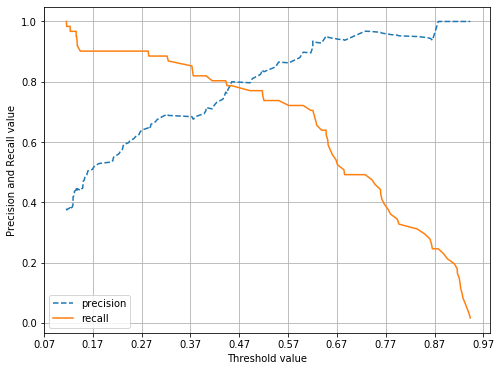

In [49]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid();
    
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

## F1 스코어

+ 정확도와 재현율을 결합한 지표
+ 두 지표가 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값 가짐

![title](F1_score.png)

In [50]:
from sklearn.metrics import f1_score

f1=f1_score(y_test,pred)
print('F1 스코어 :',f1)

F1 스코어 : 0.7966101694915254


+ 임계값 별로 F1 스코어 보기

In [55]:
def get_clf_eval(y_test,pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    
    f1=f1_score(y_test,pred)
    print('오차행렬')
    print(confusion,'\n')
    
    print(f'정확도 :{accuracy}, 정밀도: {precision}, 재현율: {recall}, F1 스코어: {f1}\n')
    
thresholds=[0.4,0.45,0.5,0.55,0.6]
pred_proba=lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값 : 0.4
오차행렬
[[97 21]
 [11 50]] 

정확도 :0.8212290502793296, 정밀도: 0.704225352112676, 재현율: 0.819672131147541, F1 스코어: 0.7575757575757576

임계값 : 0.45
오차행렬
[[105  13]
 [ 13  48]] 

정확도 :0.8547486033519553, 정밀도: 0.7868852459016393, 재현율: 0.7868852459016393, F1 스코어: 0.7868852459016392

임계값 : 0.5
오차행렬
[[108  10]
 [ 14  47]] 

정확도 :0.8659217877094972, 정밀도: 0.8245614035087719, 재현율: 0.7704918032786885, F1 스코어: 0.7966101694915254

임계값 : 0.55
오차행렬
[[111   7]
 [ 16  45]] 

정확도 :0.8715083798882681, 정밀도: 0.8653846153846154, 재현율: 0.7377049180327869, F1 스코어: 0.7964601769911505

임계값 : 0.6
오차행렬
[[113   5]
 [ 17  44]] 

정확도 :0.8770949720670391, 정밀도: 0.8979591836734694, 재현율: 0.7213114754098361, F1 스코어: 0.8



+ F1 스코어는 임계값이 0.6일때 가장 높다

### ROC 곡선과 AUC

+ 이진 분류에서 중요하게 사용되는 지표다.
![title](ROC.png)

In [57]:
from sklearn.metrics import roc_curve

pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

fprs,tprs,thresholds =roc_curve(y_test,pred_proba_class1)

thr_index=np.arange(0,thresholds.shape[0],5)
print('샘플용 10개 임계값 :',np.round(thresholds[thr_index],2))

print('샘플 임계값 별 FPR: ', np.round(fprs[thr_index],3))
print('샘플 임계값 별 TPR: ',np.round(tprs[thr_index],3))

샘플용 10개 임계값 : [1.94 0.87 0.63 0.55 0.44 0.32 0.15 0.14 0.13 0.12]
샘플 임계값 별 FPR:  [0.    0.008 0.025 0.059 0.127 0.203 0.559 0.602 0.695 0.847]
샘플 임계값 별 TPR:  [0.    0.246 0.672 0.738 0.787 0.885 0.902 0.951 0.967 0.984]


+ 시각화 해보자

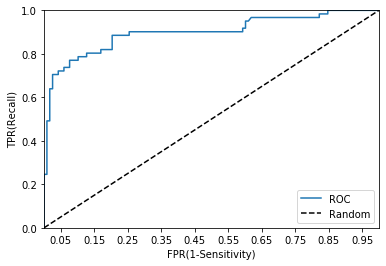

In [63]:
def roc_curve_plot(y_test,pred_proba_c1):
    fprs,tprs,thresholds =roc_curve(y_test,pred_proba_c1)
    
    plt.plot(fprs,tprs,label='ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')
    
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)');plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test,pred_proba[:,1])

+ ROC AUC 구하기

In [69]:
from sklearn.metrics import roc_auc_score

pred=lr_clf.predict(X_test)
roc_score=roc_auc_score(y_test,pred)
print('ROC AUC 값: ',round(roc_score,4))

ROC AUC 값:  0.8429


### get_clf_eval 함수에 roc auc 까지 포함해서 모든 평가지표 보자

In [70]:
def get_clf_eval(y_test,pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=round(accuracy_score(y_test,pred),4)
    precision=round(precision_score(y_test,pred),4)
    recall=round(recall_score(y_test,pred),4)
    f1=round(f1_score(y_test,pred),4)
    roc_score=round(roc_auc_score(y_test,pred),4)
    
    print('오차행렬')
    print(confusion,'\n')
    print(f'정확도 :{accuracy}, 정밀도: {precision}, 재현율: {recall}, F1 스코어: {f1}, ROC AUC: {roc_score}\n')
    
thresholds=[0.4,0.45,0.5,0.55,0.6]
pred_proba=lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값 : 0.4
오차행렬
[[97 21]
 [11 50]] 

정확도 :0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1 스코어: 0.7576, ROC AUC: 0.8209

임계값 : 0.45
오차행렬
[[105  13]
 [ 13  48]] 

정확도 :0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1 스코어: 0.7869, ROC AUC: 0.8384

임계값 : 0.5
오차행렬
[[108  10]
 [ 14  47]] 

정확도 :0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1 스코어: 0.7966, ROC AUC: 0.8429

임계값 : 0.55
오차행렬
[[111   7]
 [ 16  45]] 

정확도 :0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1 스코어: 0.7965, ROC AUC: 0.8392

임계값 : 0.6
오차행렬
[[113   5]
 [ 17  44]] 

정확도 :0.8771, 정밀도: 0.898, 재현율: 0.7213, F1 스코어: 0.8, ROC AUC: 0.8395



## 피마 인디언 당뇨병 예측

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [75]:
data=pd.read_csv('diabetes.csv')
print(data['Outcome'].value_counts())
data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [76]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=156,stratify=y)

#로지스틱 예측 
lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차행렬
[[87 13]
 [22 32]] 

정확도 :0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1 스코어: 0.6465, ROC AUC: 0.7313



+ 네거티브가 65% 이므로 재현율에 초첨을 둬 본다.

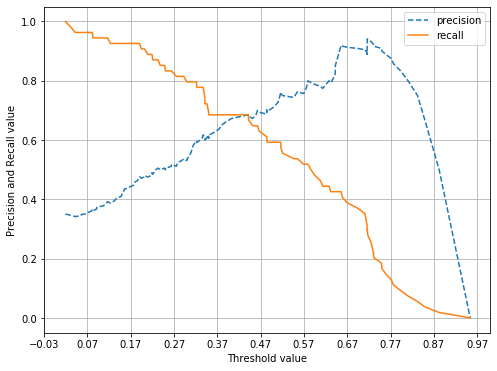

In [81]:
pred_proba_c1=lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)

In [82]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


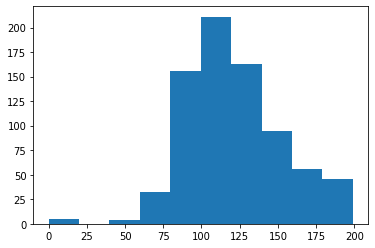

In [84]:
plt.hist(data['Glucose'],bins=10);

In [106]:
total=data['Glucose'].count()
for i in data.columns[1:6]:
    zero=data[data[i]==0][i].count()
    print(f'{i} 0 건수는 {zero}, 퍼센트는 {round(100*(zero/total),2)}%')

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.7%
BMI 0 건수는 11, 퍼센트는 1.43%


In [109]:
#BloodPressure, SkinThickness가 0인 개수가 너무 많아서 평균값으로 대체
zero_features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

mean=data[zero_features].mean()
data[zero_features]=data[zero_features].replace(0,mean)

In [128]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,
                                              random_state=156,stratify=y)

lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차행렬
[[90 10]
 [21 33]] 

정확도 :0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1 스코어: 0.6804, ROC AUC: 0.7556



+ 임계값 변화에 따른 재현율 값 성능 봐보기

In [132]:
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차행렬
[[65 35]
 [11 43]] 

정확도 :0.7013, 정밀도: 0.5513, 재현율: 0.7963, F1 스코어: 0.6515, ROC AUC: 0.7231

임곗값: 0.33
오차행렬
[[71 29]
 [11 43]] 

정확도 :0.7403, 정밀도: 0.5972, 재현율: 0.7963, F1 스코어: 0.6825, ROC AUC: 0.7531

임곗값: 0.36
오차행렬
[[76 24]
 [15 39]] 

정확도 :0.7468, 정밀도: 0.619, 재현율: 0.7222, F1 스코어: 0.6667, ROC AUC: 0.7411

임곗값: 0.39
오차행렬
[[78 22]
 [16 38]] 

정확도 :0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1 스코어: 0.6667, ROC AUC: 0.7419

임곗값: 0.42
오차행렬
[[84 16]
 [18 36]] 

정확도 :0.7792, 정밀도: 0.6923, 재현율: 0.6667, F1 스코어: 0.6792, ROC AUC: 0.7533

임곗값: 0.45
오차행렬
[[85 15]
 [18 36]] 

정확도 :0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1 스코어: 0.6857, ROC AUC: 0.7583

임곗값: 0.48
오차행렬
[[88 12]
 [19 35]] 

정확도 :0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1 스코어: 0.6931, ROC AUC: 0.7641

임곗값: 0.5
오차행렬
[[90 10]
 [21 33]] 

정확도 :0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1 스코어: 0.6804, ROC AUC: 0.7556



+ 임계값 0.48일 때 가장 좋다 다시 한번 보자

In [133]:
binarizer=Binarizer(threshold=0.48)

pred_thr_048=binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test,pred_thr_048)

오차행렬
[[88 12]
 [19 35]] 

정확도 :0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1 스코어: 0.6931, ROC AUC: 0.7641



![title](fin.png)